In [11]:
import os
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 현재 파일 경로 확인
path = os.getcwd()+'/'
path

'/Users/sunnie/sunnie/공공데이터BI/'

In [4]:
os.listdir(path+'품목별 국가별 수출입실적_2014-2023')

['품목별 국가별  수출입실적_14-18_F12.xls',
 '품목별 국가별  수출입실적_19-23_F24.xls',
 '품목별 국가별  수출입실적_19-23_F18.xls',
 '품목별 국가별  수출입실적_19-23_F19.xls',
 '품목별 국가별  수출입실적_19-23_F25.xls',
 '품목별 국가별  수출입실적_14-18_F13.xls',
 '품목별 국가별  수출입실적_14-18_F11.xls',
 '품목별 국가별  수출입실적_14-18_F9.xls',
 '품목별 국가별  수출입실적_19-23_F26.xls',
 '품목별 국가별  수출입실적_14-18_F8.xls',
 '품목별 국가별  수출입실적_14-18_F10.xls',
 '품목별 국가별  수출입실적_14-18_F14.xls',
 '.DS_Store',
 '품목별 국가별  수출입실적_19-23_F22.xls',
 '품목별 국가별  수출입실적_19-23_F23.xls',
 '품목별 국가별  수출입실적_14-18_F15.xls',
 '품목별 국가별  수출입실적_14-18_F17.xls',
 '품목별 국가별  수출입실적_19-23_F21.xls',
 '품목별 국가별  수출입실적_19-23_F20.xls',
 '품목별 국가별  수출입실ᄌ

In [5]:
df = pd.DataFrame()
df_type = {'품목코드': 'object', '수출중량': 'float64', '수입중량': 'float64',
           '수출금액': 'float64', '수입금액': 'float64', '무역수지': 'float64'}

for file in tqdm(os.listdir(path + '품목별 국가별 수출입실적_2014-2023')):
    if file.endswith('.xls') or file.endswith('.xlsx'):
        try:
            data = pd.read_excel(path + '품목별 국가별 수출입실적_2014-2023/' + file,
                                 thousands=',', dtype=df_type)
            df = pd.concat([df, data])
        except Exception as e:
            print(f"Error reading file: {file}. Error message: {str(e)}")

  0%|          | 0/54 [00:00<?, ?it/s]

100%|██████████| 54/54 [00:16<00:00,  3.33it/s]


In [12]:
display(df.shape)
display(df.head())

(125326, 9)

,기간,품목명,품목코드,국가명,수출중량,수입중량,수출금액,수입금액,무역수지
0,2014,살아 있는 동물,01,세이쉘,0.0,0.0,0.0,0.0,0.0
1,2014,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,03,세이쉘,2578.9,521.8,3926.0,3043.0,883.0
2,2014,식용의 채소ㆍ뿌리ㆍ괴경(塊莖),07,세르비아,0.0,0.2,0.0,1.0,-1.0
3,2014,"식용의 과실과 견과류, 감귤류ㆍ멜론의 껍질",08,세르비아,0.0,77.3,0.0,741.0,-741.0
4,2014,커피ㆍ차ㆍ마테(maté)ㆍ향신료,09,세르비아,0.0,0.0,0.0,0.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125326 entries, 0 to 2372
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   기간      125326 non-null  object 
 1   품목명     125325 non-null  object 
 2   품목코드    125325 non-null  object 
 3   국가명     125325 non-null  object 
 4   수출중량    125326 non-null  float64
 5   수입중량    125326 non-null  float64
 6   수출금액    125326 non-null  float64
 7   수입금액    125326 non-null  float64
 8   무역수지    125326 non-null  float64
dtypes: float64(5), object(4)
memory usage: 9.6+ MB


In [14]:
df['기간'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, '총계',
       '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [15]:
# 총계 데이터 제거
df.query('기간 != "총계"').shape

(125325, 9)

In [16]:
df = df.query('기간 != "총계"')
df['기간'] = df['기간'].astype('int64')

In [17]:
df.describe(include='all')

,기간,품목명,품목코드,국가명,수출중량,수입중량,수출금액,수입금액,무역수지
count,125325.000000,125325,125325,125325,1.253250e+05,1.253250e+05,1.253250e+05,1.253250e+05,1.253250e+05
unique,NaN,96,96,252,NaN,NaN,NaN,NaN,NaN
top,NaN,"전기기기와 그 부분품, 녹음기ㆍ음성 재생기ㆍ텔레비전의 영상과 음성의 기록기ㆍ재생기와...",85,홍콩,NaN,NaN,NaN,NaN,NaN
freq,NaN,2365,2365,1429,NaN,NaN,NaN,NaN,NaN
mean,2018.454530,NaN,NaN,NaN,1.532645e+04,4.807019e+04,4.541059e+04,4.070886e+04,4.701724e+03
std,2.841793,NaN,NaN,NaN,2.337477e+05,1.159195e+06,7.315966e+05,5.792556e+05,5.758301e+05
min,2014.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.986482e+07
25%,2016.000000,NaN,NaN,NaN,1.000000e-01,0.000000e+00,2.000000e+00,0.000000e+00,-1.500000e+01
50%,2018.000000,NaN,NaN,NaN,9.200000e+00,1.000000e-01,8.500000e+01,3.000000e+00,1.000000e+01
75%,2021.000000,NaN,NaN,NaN,2.870000e+02,6.810000e+01,1.737000e+03,6.420000e+02,5.760000e+02


In [11]:
print(sorted(df['기간'].unique()))
print(sorted(df['품목명'].unique()))
print(sorted(df['품목코드'].unique()))
print(sorted(df['국가명'].unique()))

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
['가구, 침구ㆍ매트리스ㆍ매트리스 서포트(mattress support)ㆍ쿠션과 이와 유사한 물품, 다른 류로 분류되지 않은 조명기구, 조명용 사인ㆍ조명용 네임플레이트(name-plate)와 이와 유사한 물품, 조립식 건축물', '가죽제품, 마구, 여행용구ㆍ핸드백과 이와 유사한 용기, 동물 거트(gut)[누에의 거트(gut)는 제외한다]의 제품', '각종 조제 식료품', '각종 화학공업 생산품', '견', '고무와 그 제품', '곡물', '곡물ㆍ고운 가루ㆍ전분ㆍ밀크의 조제품과 베이커리 제품', '광(鑛)ㆍ슬래그(slag)ㆍ회(灰)', '광물성 연료ㆍ광물유(鑛物油)와 이들의 증류물, 역청(瀝靑)물질, 광물성 왁스', '광학기기ㆍ사진용 기기ㆍ영화용 기기ㆍ측정기기ㆍ검사기기ㆍ정밀기기ㆍ의료용 기기, 이들의 부분품과 부속품', '구리와 그 제품', '그 밖의 비금속(卑金屬), 서멧(cermet), 이들의 제품', '그 밖의 식물성 방직용 섬유, 종이실(paper yarn)과 종이실로 만든 직물', '낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품', '납과 그 제품', '니켈과 그 제품', '다른 류로 분류되지 않은 동물성 생산품', '단백질계 물질, 변성전분, 글루(glue), 효소', '담배와 제조한 담배 대용물, 연소시키지 않고흡입하도록 만들어진 물품(니코틴을 함유하였는지에 상관없다), 니코틴을 함유한 그 밖의 물품으로 인체 내에 니코틴을 흡수시키도록 만들어진 것', '당류(糖類)와 설탕과자', '도자제품', '돌ㆍ플라스터(plaster)ㆍ시멘트ㆍ석면ㆍ운모나 이와 유사한 재료의 제품', '동물성ㆍ식물성ㆍ미생물성 지방과 기름 및이들의 분해생산물, 조제한 식용 지방과 동물성ㆍ식물성 왁스', '락(lac), 검ㆍ수지ㆍ그 밖의 식물성 수액과 추출물(extract)', '메리야스 편물과 뜨개질 편물', '면', '모자류와 그 부분품', '모

In [18]:
print('총 국가 수:', len(df['국가명'].unique()))
print('총 품목 수:', len(df['품목코드'].unique()))

총 국가 수: 252
총 품목 수: 96


In [19]:
# 2023년은 아직 1년이 다 차지 않았기 때문에 제외
df = df.query('기간 != 2023')
sorted(df['기간'].unique())

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [20]:
# 수출 이력이 있는 경우만 남기기
df_export = df.query('수출금액 > 0')
df_export.describe()

,기간,수출중량,수입중량,수출금액,수입금액,무역수지
count,90108.000000,9.010800e+04,9.010800e+04,9.010800e+04,9.010800e+04,9.010800e+04
mean,2017.954255,2.045218e+04,5.719787e+04,6.035938e+04,5.145917e+04,8.900197e+03
std,2.578148,2.734024e+05,1.269302e+06,8.551702e+05,6.692686e+05,6.689318e+05
min,2014.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-3.986482e+07
25%,2016.000000,2.200000e+00,0.000000e+00,2.800000e+01,0.000000e+00,1.000000e+00
50%,2018.000000,4.000000e+01,2.000000e-01,3.070000e+02,6.000000e+00,6.500000e+01
75%,2020.000000,7.067250e+02,1.154250e+02,3.821250e+03,1.210000e+03,1.417250e+03
max,2022.000000,1.872824e+07,7.346859e+07,7.244500e+07,5.604446e+07,3.330290e+07


### 1) Recency 

In [21]:
temp = df_export[['국가명','품목코드','기간']].copy()
temp['today'] = 2023

temp['recency'] = (temp['today'] - temp['기간'])
recency = temp.groupby(['국가명','품목코드'], as_index=False).recency.min()
recency

,국가명,품목코드,recency
0,가나,02,9
1,가나,03,1
2,가나,04,7
3,가나,07,8
4,가나,09,2
...,...,...,...
13435,홍콩,92,1
13436,홍콩,94,1
13437,홍콩,95,1
13438,홍콩,96,1


In [22]:
recency.describe()

,recency
count,13440.000000
mean,1.933482
std,1.921027
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,9.000000


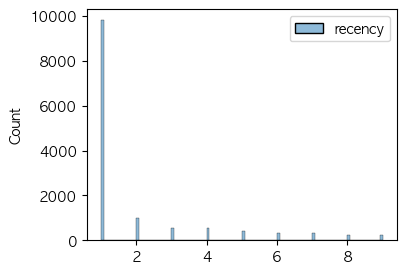

In [23]:
plt.figure(figsize=(4, 3))
sns.histplot(recency)
plt.show()

### 2) Frequency

In [24]:
frequency = df_export.groupby(['국가명','품목코드'], as_index=False).기간.nunique()
frequency.rename(columns={'기간':'frequency'}, inplace=True)
frequency

,국가명,품목코드,frequency
0,가나,02,1
1,가나,03,9
2,가나,04,3
3,가나,07,2
4,가나,09,6
...,...,...,...
13435,홍콩,92,9
13436,홍콩,94,9
13437,홍콩,95,9
13438,홍콩,96,9


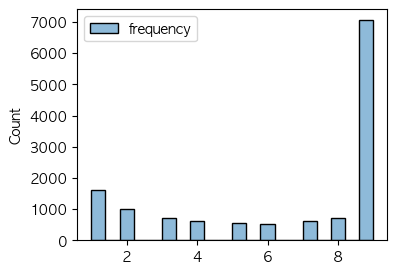

In [25]:
plt.figure(figsize=(4, 3))
sns.histplot(frequency)
plt.show()

### 3) Monetary

In [26]:
monetary = df_export.groupby(['국가명','품목코드'], as_index=False).수출금액.sum()
monetary.rename(columns={'수출금액':'monetary'}, inplace=True)
monetary

,국가명,품목코드,monetary
0,가나,02,6.0
1,가나,03,60421.0
2,가나,04,47.0
3,가나,07,3.0
4,가나,09,40.0
...,...,...,...
13435,홍콩,92,11606.0
13436,홍콩,94,136071.0
13437,홍콩,95,230804.0
13438,홍콩,96,334091.0


In [27]:
monetary.describe()

,monetary
count,1.344000e+04
mean,4.046773e+05
std,6.723428e+06
min,1.000000e+00
25%,5.200000e+01
50%,8.570000e+02
75%,1.518950e+04
max,5.187551e+08


In [28]:
# 가장 수출액이 큰 품목 및 수출국
display(monetary[monetary['monetary'] == monetary['monetary'].max()])
print('품목코드:', monetary[monetary['monetary'] == monetary['monetary'].max()].품목코드.values[0])
print('품목명:', df_export.query('품목코드=="85"').iloc[0].품목명)

,국가명,품목코드,monetary
9794,중국,85,518755110.0


품목코드: 85
품목명: 전기기기와 그 부분품, 녹음기ㆍ음성 재생기ㆍ텔레비전의 영상과 음성의 기록기ㆍ재생기와 이들의 부분품ㆍ부속품


### 4) Duration

In [29]:
def calc_successive(df):
    '''연속적으로 수출하고 있는지 여부 계산
    올해 수출하고 내년에도 수출했으면 1, 아니면 0'''
    df = df.sort_values('기간')
    df['successive'] = df['기간'].diff().fillna(1) 
    df['successive'] = df['successive'].apply(lambda x: 1 if x == 1 else 0)
    return df

def count_successive(df):
    '''최대 몇 년 연속 수출했는지 계산'''
    cnt,record = 0,0
    for i in df['successive'].values.tolist(): 
        if i == 1:
            cnt += 1
            if cnt > record:
                record = cnt
        else:
            if cnt > record:
                record = cnt
                cnt = 0
            else:
                cnt = 0
    return record

In [31]:
# 함수 적용 예시
temp = df_export.groupby(['국가명','품목코드'], as_index=False)
tt = temp.get_group(('가나', '12')).sort_values('기간').copy()
display(tt)
display(calc_successive(tt))
print(f'=> 최대 {count_successive(calc_successive(tt))}년 연속 수출')

,기간,품목명,품목코드,국가명,수출중량,수입중량,수출금액,수입금액,무역수지
28,2014,"채유(採油)에 적합한 종자와 과실, 각종 종자와 과실, 공업용ㆍ의약용 식물, 짚과 ...",12,가나,0.0,0.0,1.0,0.0,1.0
360,2015,"채유(採油)에 적합한 종자와 과실, 각종 종자와 과실, 공업용ㆍ의약용 식물, 짚과 ...",12,가나,0.0,0.0,2.0,0.0,1.0
681,2016,"채유(採油)에 적합한 종자와 과실, 각종 종자와 과실, 공업용ㆍ의약용 식물, 짚과 ...",12,가나,0.0,0.0,3.0,0.0,2.0
1014,2017,"채유(採油)에 적합한 종자와 과실, 각종 종자와 과실, 공업용ㆍ의약용 식물, 짚과 ...",12,가나,0.5,0.0,4.0,0.0,4.0
30,2019,"채유(採油)에 적합한 종자와 과실, 각종 종자와 과실, 공업용ㆍ의약용 식물, 짚과 ...",12,가나,0.2,0.0,5.0,0.0,5.0
389,2020,"채유(採油)에 적합한 종자와 과실, 각종 종자와 과실, 공업용ㆍ의약용 식물, 짚과 ...",12,가나,0.1,0.0,5.0,0.0,5.0


,기간,품목명,품목코드,국가명,수출중량,수입중량,수출금액,수입금액,무역수지,successive
28,2014,"채유(採油)에 적합한 종자와 과실, 각종 종자와 과실, 공업용ㆍ의약용 식물, 짚과 ...",12,가나,0.0,0.0,1.0,0.0,1.0,1
360,2015,"채유(採油)에 적합한 종자와 과실, 각종 종자와 과실, 공업용ㆍ의약용 식물, 짚과 ...",12,가나,0.0,0.0,2.0,0.0,1.0,1
681,2016,"채유(採油)에 적합한 종자와 과실, 각종 종자와 과실, 공업용ㆍ의약용 식물, 짚과 ...",12,가나,0.0,0.0,3.0,0.0,2.0,1
1014,2017,"채유(採油)에 적합한 종자와 과실, 각종 종자와 과실, 공업용ㆍ의약용 식물, 짚과 ...",12,가나,0.5,0.0,4.0,0.0,4.0,1
30,2019,"채유(採油)에 적합한 종자와 과실, 각종 종자와 과실, 공업용ㆍ의약용 식물, 짚과 ...",12,가나,0.2,0.0,5.0,0.0,5.0,0
389,2020,"채유(採油)에 적합한 종자와 과실, 각종 종자와 과실, 공업용ㆍ의약용 식물, 짚과 ...",12,가나,0.1,0.0,5.0,0.0,5.0,1


=> 최대 4년 연속 수출


In [32]:
# temp의 key 개수 확인
len(temp.groups.keys())

13440

In [33]:
temp = df_export.groupby(['국가명','품목코드'], as_index=False)
duration = temp.progress_apply(lambda df: count_successive(calc_successive(df)))
duration.rename(columns={None:'duration'}, inplace=True)
duration

  0%|          | 0/13440 [00:00<?, ?it/s]

100%|██████████| 13440/13440 [00:10<00:00, 1289.47it/s]


,국가명,품목코드,duration
0,가나,02,1
1,가나,03,9
2,가나,04,3
3,가나,07,2
4,가나,09,4
...,...,...,...
13435,홍콩,92,4
13436,홍콩,94,4
13437,홍콩,95,4
13438,홍콩,96,4


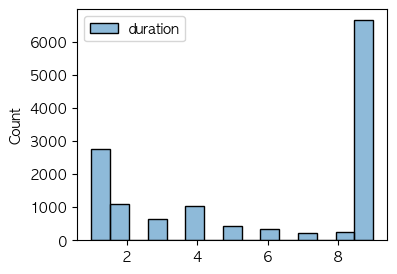

In [34]:
plt.figure(figsize=(4, 3))
sns.histplot(duration)
plt.show()

### RFMD 통합 및 구간 나누기

In [35]:
# R,F,M,D 데이터 통합
rfmd = pd.merge(recency, frequency, how='inner', on=['국가명','품목코드'])
rfmd = pd.merge(rfmd, monetary, how='inner', on=['국가명','품목코드'])
rfmd = pd.merge(rfmd, duration, how='inner', on=['국가명','품목코드'])
rfmd

,국가명,품목코드,recency,frequency,monetary,duration
0,가나,02,9,1,6.0,1
1,가나,03,1,9,60421.0,9
2,가나,04,7,3,47.0,3
3,가나,07,8,2,3.0,2
4,가나,09,2,6,40.0,4
...,...,...,...,...,...,...
13435,홍콩,92,1,9,11606.0,4
13436,홍콩,94,1,9,136071.0,4
13437,홍콩,95,1,9,230804.0,4
13438,홍콩,96,1,9,334091.0,4


In [36]:
# 분위수 확인
rfmd.describe()

,recency,frequency,monetary,duration
count,13440.000000,13440.000000,1.344000e+04,13440.000000
mean,1.933482,6.534970,4.046773e+05,5.856324
std,1.921027,3.101521,6.723428e+06,3.423780
min,1.000000,1.000000,1.000000e+00,1.000000
25%,1.000000,4.000000,5.200000e+01,2.000000
50%,1.000000,9.000000,8.570000e+02,8.000000
75%,2.000000,9.000000,1.518950e+04,9.000000
max,9.000000,9.000000,5.187551e+08,9.000000


In [37]:
# 각 분위수별 값 설정 및 total 스코어 생성

rfmd['rec_score'] = pd.qcut(rfmd['recency'],4, labels =[2,1], duplicates='drop') 
rfmd['fre_score'] = pd.qcut(rfmd['frequency'],4, labels =[1,2], duplicates='drop')
rfmd['mon_score'] = pd.qcut(rfmd['monetary'],4, labels =[1,2,3,4])
rfmd['dur_score'] = pd.qcut(rfmd['duration'],4, labels =[1,2,3], duplicates='drop')
rfmd['total_score'] = rfmd['rec_score'].astype(int) + rfmd['fre_score'].astype(int) \
                    + rfmd['mon_score'].astype(int) + rfmd['dur_score'].astype(int)
rfmd.head(10)

,국가명,품목코드,recency,frequency,monetary,duration,rec_score,fre_score,mon_score,dur_score,total_score
0,가나,02,9,1,6.0,1,1,1,1,1,4
1,가나,03,1,9,60421.0,9,2,2,4,3,11
2,가나,04,7,3,47.0,3,1,1,1,2,5
3,가나,07,8,2,3.0,2,1,1,1,1,4
4,가나,09,2,6,40.0,4,2,2,1,2,7
5,가나,10,1,3,3.0,2,2,1,1,1,5
6,가나,11,4,3,541.0,2,1,1,2,1,5
7,가나,12,3,6,20.0,4,1,2,1,2,6
8,가나,13,4,1,2.0,1,1,1,1,1,4
9,가나,15,1,9,76.0,9,2,2,2,3,9


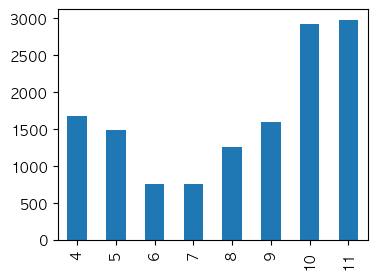

In [38]:
# 데이터 분포 시각화
plt.figure(figsize=(4, 3))
rfmd['total_score'].value_counts().sort_index().plot(kind='bar')
plt.show()

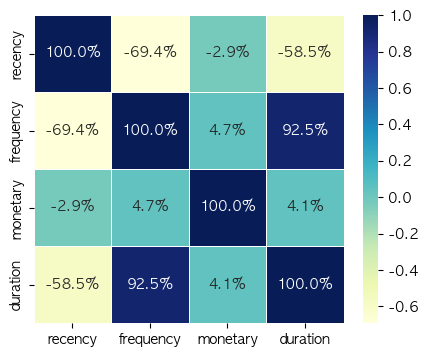

In [39]:
#  RFM 점수 상관분석
plt.figure(figsize =(5,4))
sns.heatmap(data=rfmd[['recency','frequency','monetary','duration']].corr(), annot= True,
            fmt='.1%', linewidths=.5, cmap='YlGnBu')
plt.show() 

- 상관관계가 높게 나타난 frequency와 duration 중에 하나를 선택

In [40]:
# 각 구간별 점수 및 count 수 확인
print(rfmd.groupby('rec_score').recency.agg(['min', 'max', 'count']))
print(rfmd.groupby('fre_score').frequency.agg(['min', 'max', 'count']))
print(rfmd.groupby('mon_score').monetary.agg(['min', 'max', 'count']))
print(rfmd.groupby('dur_score').duration.agg(['min', 'max', 'count']))

           min  max  count
rec_score                 
2            1    2  10791
1            3    9   2649
           min  max  count
fre_score                 
1            1    4   3970
2            5    9   9470
               min          max  count
mon_score                             
1              1.0         52.0   3380
2             53.0        857.0   3341
3            858.0      15183.0   3359
4          15209.0  518755110.0   3360
           min  max  count
dur_score                 
1            1    2   3846
2            3    8   2936
3            9    9   6658


In [41]:
# 각 구간별 점수 및 count 수 확인
print(rfmd.groupby('rec_score').recency.agg(['min', 'max', 'count']))
print(rfmd.groupby('fre_score').frequency.agg(['min', 'max', 'count']))
print(rfmd.groupby('mon_score').monetary.agg(['min', 'max', 'count']))
print(rfmd.groupby('dur_score').duration.agg(['min', 'max', 'count']))

           min  max  count
rec_score                 
2            1    2  10791
1            3    9   2649
           min  max  count
fre_score                 
1            1    4   3970
2            5    9   9470
               min          max  count
mon_score                             
1              1.0         52.0   3380
2             53.0        857.0   3341
3            858.0      15183.0   3359
4          15209.0  518755110.0   3360
           min  max  count
dur_score                 
1            1    2   3846
2            3    8   2936
3            9    9   6658


**rec_score** 
- 3점 : 1년 이내 
- 2점 : 2년 이내 
- 1점 : 2년 초과

**fre_score**
- 1점 : 4년 이하 
- 2점 : 7년 이하
- 3점 : 9년 이하

**mon_score** 
- 1점 : $50K 이내 
- 2점 : $850K 이내 
- 3점 : $15,000K 이내
- 4점 : $15,000K 초과

**dur_score**
- 변동없음 
- 1점 : 2년 이하 
- 2점 : 8년 이하
- 3점 : 9년

In [42]:
# 사용자 정의 구간화 
bins = {'rec_bin':[0,1,2,10], 'fre_bin':[0,4,7,10], 'mon_bin':[0,50,850,15000,600000000]}
rfmd_custom = rfmd.copy()
rfmd_custom['rec_score'] = pd.cut(rfmd_custom['recency'], bins['rec_bin'], right= True, labels= [3,2,1])
rfmd_custom['fre_score'] = pd.cut(rfmd_custom['recency'], bins['rec_bin'], right= True, labels= [3,2,1])
rfmd_custom['mon_score'] = pd.cut(rfmd_custom['monetary'], bins['mon_bin'], right= True, labels= [1,2,3,4])

In [43]:
# RFM 모델
rfm_custom = rfmd_custom.copy()
rfm_custom['total_score'] = rfmd_custom['rec_score'].astype(int)\
                            +rfmd_custom['fre_score'].astype(int)\
                            +rfmd_custom['mon_score'].astype(int)

# RMD 모델
rmd_custom = rfmd_custom.copy()
rmd_custom['total_score'] = rfmd_custom['rec_score'].astype(int)\
                            +rfmd_custom['mon_score'].astype(int)\
                            +rfmd_custom['dur_score'].astype(int)

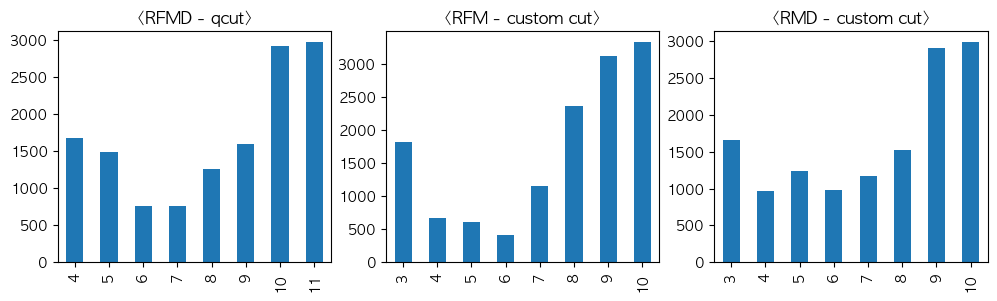

In [44]:
# 데이터 분포 시각화
plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
rfmd['total_score'].value_counts().sort_index().plot(kind='bar')
plt.title('<RFMD - qcut>')
plt.subplot(1,3,2)
rfm_custom['total_score'].value_counts().sort_index().plot(kind='bar')
plt.title('<RFM - custom cut>')
plt.subplot(1,3,3)
rmd_custom['total_score'].value_counts().sort_index().plot(kind='bar')
plt.title('<RMD - custom cut>')
plt.show()

- RMD 모델 채택
- 무역에서는 단순히 빈도가 높은 것(frequency) 보다 얼마나 안정적으로 오랜기간 거래를 하는지(duration)이 더 중요

In [45]:
# RMD 모형의 분포 확인 
rmd_custom[['rec_score', 'mon_score', 'dur_score']].value_counts(sort= False, normalize=True).unstack()

dur_score                   1         2         3
rec_score mon_score                              
3         1          0.051935  0.021949  0.002827
          2          0.025893  0.070536  0.077679
          3          0.004390  0.034301  0.192783
          4          0.000967  0.024033  0.222098
2         1          0.030580  0.005208       NaN
          2          0.010863  0.016815       NaN
          3          0.001116  0.007589       NaN
          4          0.000446  0.000893       NaN
1         1          0.123810  0.011161       NaN
          2          0.030060  0.019568       NaN
          3          0.004241  0.005580       NaN
          4          0.001860  0.000818       NaN

=> 'rec_score', 'mon_score', 'dur_score' 변수를 군집화에 사용

In [48]:
rmd_custom.columns

Index(['국가명', '품목코드', 'recency', 'frequency', 'monetary', 'duration',
       'rec_score', 'fre_score', 'mon_score', 'dur_score', 'total_score'],
      dtype='object')

In [49]:
final = rmd_custom[['국가명','품목코드','rec_score','mon_score','dur_score']]
final

,국가명,품목코드,rec_score,mon_score,dur_score
0,가나,02,1,1,1
1,가나,03,3,4,3
2,가나,04,1,1,2
3,가나,07,1,1,1
4,가나,09,2,1,2
...,...,...,...,...,...
13435,홍콩,92,3,3,2
13436,홍콩,94,3,4,2
13437,홍콩,95,3,4,2
13438,홍콩,96,3,4,2


In [50]:
# 최종 데이터프레임 저장
final.to_csv('RFMD_score.csv', index=False)

##### 번외) 5개 구간으로 통합
- 1 : total_score 10점
- 2 : total_score 9점
- 3 : total_score 7~8점
- 4 : total_score 5~6점
- 5 : total_score 3~4점

In [169]:
def set_seg(x):
    if x == 10:
        result = 1
    elif x == 9:
        result = 2
    elif x >= 7:
        result = 3
    elif x >= 5:
        result = 4
    else:
        result = 5
    return result

rmd_custom['seg'] = np.nan
rmd_custom['seg'] = rmd_custom['total_score'].apply(lambda x: set_seg(x))
rmd_custom

,국가명,품목코드,recency,frequency,monetary,duration,rec_score,fre_score,mon_score,dur_score,total_score,seg
0,가나,02,9,1,6.0,1,1,1,1,1,3,5
1,가나,03,1,9,60421.0,9,3,3,4,3,10,1
2,가나,04,7,3,47.0,3,1,1,1,2,4,5
3,가나,07,8,2,3.0,2,1,1,1,1,3,5
4,가나,09,2,6,40.0,4,2,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
13435,홍콩,92,1,9,11606.0,4,3,3,3,2,8,3
13436,홍콩,94,1,9,136071.0,4,3,3,4,2,9,2
13437,홍콩,95,1,9,230804.0,4,3,3,4,2,9,2
13438,홍콩,96,1,9,334091.0,4,3,3,4,2,9,2
